Chapter 17

# 二元函数的近似
Book_3《数学要素》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码通过泰勒展开对二维函数

$$
f(x, y) = e^{-x^2 - y^2}
$$

在特定点 $(x_a, y_b)$ 处进行近似，以分析函数在该点附近的局部行为。代码使用零阶、一阶和二阶展开来逐步提高近似精度，并在三维图中展示不同近似阶数与原函数曲面之间的对比。

1. **零阶近似（常数近似）**：零阶展开即为在 $(x_a, y_b)$ 处的函数值 $f(x_a, y_b)$，给出一个简单的常数近似：

   $$
   f(x, y) \approx f(x_a, y_b)
   $$

   该近似表示在 $(x_a, y_b)$ 处的局部平坦性。

2. **一阶近似（线性近似）**：加入一阶导数项，构建线性近似。设 $\frac{\partial f}{\partial x}$ 和 $\frac{\partial f}{\partial y}$ 分别为 $f$ 在 $x$ 和 $y$ 方向上的偏导数，则一阶近似为：

   $$
   f(x, y) \approx f(x_a, y_b) + \frac{\partial f}{\partial x} (x - x_a) + \frac{\partial f}{\partial y} (y - y_b)
   $$

   该近似通过包含线性项来刻画 $f(x, y)$ 在 $(x_a, y_b)$ 附近的变化趋势。

3. **二阶近似（二次近似）**：加入二阶导数项，以提高近似的精度。此时，近似表达式包含二阶偏导数 $\frac{\partial^2 f}{\partial x^2}$、$\frac{\partial^2 f}{\partial y^2}$ 以及混合偏导 $\frac{\partial^2 f}{\partial x \partial y}$，给出如下展开式：

   $$
   f(x, y) \approx f(x_a, y_b) + \frac{\partial f}{\partial x} (x - x_a) + \frac{\partial f}{\partial y} (y - y_b) + \frac{1}{2} \left( \frac{\partial^2 f}{\partial x^2} (x - x_a)^2 + 2 \frac{\partial^2 f}{\partial x \partial y} (x - x_a)(y - y_b) + \frac{\partial^2 f}{\partial y^2} (y - y_b)^2 \right)
   $$

   该二次近似提供了 $f(x, y)$ 的局部曲率信息，能够更加准确地描述函数的变化趋势和形状。

通过将这三种不同近似与原函数在三维空间中对比，可以观察到随着近似阶数的增加，近似曲面逐渐贴近 $f(x, y)$ 的原始曲面。这种局部近似分析展示了泰勒展开的应用，帮助理解 $f(x, y)$ 在指定点附近的几何性质和行为。

## 导入包

In [1]:
import numpy as np
from sympy import lambdify, diff, exp, latex, simplify  # 导入符号计算和数学库
from sympy.abc import x, y  # 定义符号变量 x 和 y
from matplotlib import pyplot as plt  # 导入 Matplotlib 进行绘图
from matplotlib import cm  # 导入颜色映射模块

## 创建网格和定义函数 f(x, y)

In [2]:
num = 301  # 设置网格数量
x_array = np.linspace(-1.5, 1.5, num)  # x 的取值范围
y_array = np.linspace(-1.5, 1.5, num)  # y 的取值范围

## 准备数据

In [3]:
xx, yy = np.meshgrid(x_array, y_array)  # 创建 x 和 y 的网格
num_stride = 10  # 绘制时的步长

In [4]:
f_xy = exp(-x**2 - y**2)  # 定义函数 f(x, y) = exp(-x^2 - y^2)
f_xy_fcn = lambdify([x, y], f_xy)  # 将符号函数转换为数值函数
f_xy_zz = f_xy_fcn(xx, yy)  # 计算 f(x, y) 在全局网格上的值

## 定义展开点

In [5]:
x_a = -0.1  # 展开点 x_a
y_b = -0.2  # 展开点 y_b

## 创建局部网格

In [6]:
x_a_array = np.linspace(x_a - 0.5, x_a + 0.5, 101)  # x 的局部范围
y_b_array = np.linspace(y_b - 0.5, y_b + 0.5, 101)  # y 的局部范围

xx_local, yy_local = np.meshgrid(x_a_array, y_b_array)  # 创建局部网格

f_xy_zz_local = f_xy_fcn(xx_local, yy_local)  # 计算 f(x, y) 在局部网格上的值

## 展开点处的函数值

In [7]:
f_ab = f_xy_fcn(x_a, y_b)  # 计算 f(x_a, y_b) 的值

## 零阶近似 (常数近似)

In [8]:
f_ab = f_xy_fcn(x_a, y_b)  # 再次计算 f(x_a, y_b) 用于零阶近似

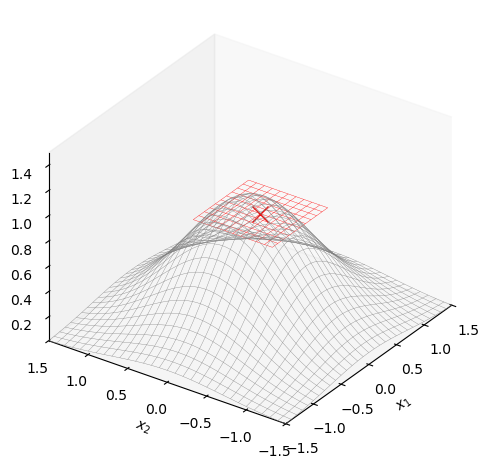

In [9]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})  # 创建三维图形窗口

ax.plot_wireframe(xx, yy, f_xy_zz,
                  color=[0.5, 0.5, 0.5],
                  rstride=num_stride, cstride=num_stride,
                  linewidth=0.25)  # 绘制全局网格上的 f(x, y)

approx_zero_order = f_ab + xx_local * 0  # 常数近似

ax.plot_wireframe(xx_local, yy_local, approx_zero_order,
                  color=[1, 0, 0],
                  rstride=num_stride, cstride=num_stride,
                  linewidth=0.25)  # 绘制局部网格上的零阶近似平面

ax.plot(x_a, y_b, f_ab, marker='x', color='r',
        markersize=12)  # 标记展开点

ax.set_proj_type('ortho')  # 设置正交投影

ax.set_xlabel('$x_1$')  # 设置 x 轴标签
ax.set_ylabel('$x_2$')  # 设置 y 轴标签
ax.set_zlabel('$f(x_1,x_2)$')  # 设置 z 轴标签

ax.set_xlim(xx.min(), xx.max())  # 设置 x 轴范围
ax.set_ylim(yy.min(), yy.max())  # 设置 y 轴范围
ax.set_zlim(f_xy_zz.min(), 1.5)  # 设置 z 轴范围

ax.view_init(azim=-145, elev=30)  # 设置视角
plt.tight_layout()
ax.grid(False)
plt.show()

## 一阶近似 (线性近似)

In [10]:
df_dx = f_xy.diff(x)  # 计算 f(x, y) 对 x 的偏导数
df_dx

-2*x*exp(-x**2 - y**2)

In [11]:
df_dx_fcn = lambdify([x, y], df_dx)  # 转换为数值函数
df_dx_a_b = df_dx_fcn(x_a, y_b)  # 计算偏导数在 (x_a, y_b) 处的值

In [12]:
df_dy = f_xy.diff(y)  # 计算 f(x, y) 对 y 的偏导数
df_dy

-2*y*exp(-x**2 - y**2)

In [13]:
df_dy_fcn = lambdify([x, y], df_dy)  # 转换为数值函数
df_dy_a_b = df_dy_fcn(x_a, y_b)  # 计算偏导数在 (x_a, y_b) 处的值

In [14]:
approx_first_order = approx_zero_order + df_dx_a_b * (xx_local - x_a) + df_dy_a_b * (yy_local - y_b)  # 一阶近似

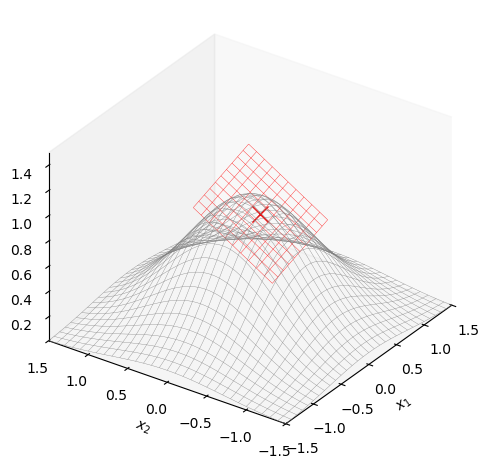

In [15]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})  # 创建三维图形窗口

ax.plot_wireframe(xx, yy, f_xy_zz,
                  color=[0.5, 0.5, 0.5],
                  rstride=num_stride, cstride=num_stride,
                  linewidth=0.25)  # 绘制全局网格上的 f(x, y)

ax.plot_wireframe(xx_local, yy_local, approx_first_order,
                  color=[1, 0, 0],
                  rstride=num_stride, cstride=num_stride,
                  linewidth=0.25)  # 绘制局部网格上的一阶近似平面

ax.plot(x_a, y_b, f_ab, marker='x', color='r',
        markersize=12)  # 标记展开点

ax.set_proj_type('ortho')  # 设置正交投影

ax.set_xlabel('$x_1$')  # 设置 x 轴标签
ax.set_ylabel('$x_2$')  # 设置 y 轴标签
ax.set_zlabel('$f(x_1,x_2)$')  # 设置 z 轴标签

ax.set_xlim(xx.min(), xx.max())  # 设置 x 轴范围
ax.set_ylim(yy.min(), yy.max())  # 设置 y 轴范围
ax.set_zlim(f_xy_zz.min(), 1.5)  # 设置 z 轴范围

ax.view_init(azim=-145, elev=30)  # 设置视角
plt.tight_layout()
ax.grid(False)
plt.show()

## 二阶近似 (二次近似)

In [16]:
d2f_dxdx = f_xy.diff(x, 2)  # 计算 f(x, y) 对 x 的二阶偏导数
d2f_dxdx

2*(2*x**2 - 1)*exp(-x**2 - y**2)

In [17]:
d2f_dxdx_fcn = lambdify([x, y], d2f_dxdx)  # 转换为数值函数
d2f_dxdx_a_b = d2f_dxdx_fcn(x_a, y_b)  # 计算二阶偏导数在 (x_a, y_b) 处的值

In [18]:
d2f_dxdy = f_xy.diff(x, y)  # 计算 f(x, y) 对 x 和 y 的混合二阶偏导数
d2f_dxdy

4*x*y*exp(-x**2 - y**2)

In [19]:
d2f_dxdy_fcn = lambdify([x, y], d2f_dxdy)  # 转换为数值函数
d2f_dxdy_a_b = d2f_dxdy_fcn(x_a, y_b)  # 计算混合二阶偏导数在 (x_a, y_b) 处的值

In [20]:
d2f_dydy = f_xy.diff(y, 2)  # 计算 f(x, y) 对 y 的二阶偏导数
d2f_dydy

2*(2*y**2 - 1)*exp(-x**2 - y**2)

In [21]:
d2f_dydy_fcn = lambdify([x, y], d2f_dydy)  # 转换为数值函数
d2f_dydy_a_b = d2f_dydy_fcn(x_a, y_b)  # 计算二阶偏导数在 (x_a, y_b) 处的值

In [22]:
approx_second_order = approx_first_order + (d2f_dxdx_a_b * (xx_local - x_a)**2
                                            + 2 * d2f_dxdy_a_b * (xx_local - x_a) * (yy_local - y_b)
                                            + d2f_dydy_a_b * (yy_local - y_b)**2) / 2  # 二阶近似

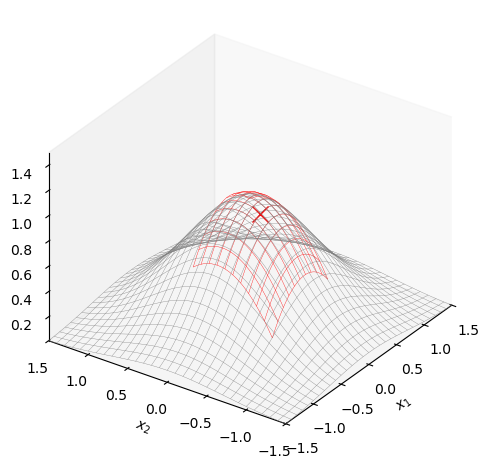

In [23]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})  # 创建三维图形窗口

ax.plot_wireframe(xx, yy, f_xy_zz,
                  color=[0.5, 0.5, 0.5],
                  rstride=num_stride, cstride=num_stride,
                  linewidth=0.25)  # 绘制全局网格上的 f(x, y)

ax.plot_wireframe(xx_local, yy_local, approx_second_order,
                  color=[1, 0, 0],
                  rstride=num_stride, cstride=num_stride,
                  linewidth=0.25)  # 绘制局部网格上的二阶近似平面

ax.plot(x_a, y_b, f_ab, marker='x', color='r',
        markersize=12)  # 标记展开点

ax.set_proj_type('ortho')  # 设置正交投影

ax.set_xlabel('$x_1$')  # 设置 x 轴标签
ax.set_ylabel('$x_2$')  # 设置 y 轴标签
ax.set_zlabel('$f(x_1,x_2)$')  # 设置 z 轴标签

ax.set_xlim(xx.min(), xx.max())  # 设置 x 轴范围
ax.set_ylim(yy.min(), yy.max())  # 设置 y 轴范围
ax.set_zlim(f_xy_zz.min(), 1.5)  # 设置 z 轴范围

ax.view_init(azim=-145, elev=30)  # 设置视角
plt.tight_layout()
ax.grid(False)
plt.show()